# Homework 1

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import combinations
import collections

# Question 2.i

In [2]:
G=nx.gnp_random_graph(5242,0.00105,seed=20160 )

In [3]:
N = len(G)
L = G.size()
sL= G.number_of_selfloops()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)
clCo=nx.average_clustering(G)
gClCo=nx.transitivity(G)

In [4]:

subGraphsDiam=[]
if nx.is_connected(G)==False:
    comp=nx.connected_component_subgraphs(G)
    for i in comp:
        subGraphsDiam.append(nx.diameter(i))
    diam=max(subGraphsDiam)
else:
    diam=nx.diameter(G)


In the cell bellow, we calculate the maximum connected component for the weakest and strongest connected compontent, as seen bellow. Because we have a undirected graph, we dont have a strong and weak connected components, as per definition.

In [5]:
strong = G.subgraph(max(nx.connected_components(G), key=len))
weak = G.subgraph(max(nx.connected_components(G), key=len))

In [6]:
def have_bidirectional_relationship(G, node1, node2):
    return G.has_edge(node1, node2) and G.has_edge(node2, node1)

In [7]:
biconnections = set()
for u, v in G.edges():
    if u > v:  # Avoid duplicates, such as (1, 2) and (2, 1)
        v, u = u, v
    if have_bidirectional_relationship(G, u, v):
        biconnections.add((u, v))


In [8]:
print("===============================================\n")
print("Our results\n")
print("===============================================\n")
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Number of self loops", sL)
print()
print("Number of reciprocated edges",len(biconnections))
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print()
print("Diameter", diam)
print()
print("Average clustering coefficient:",clCo)
print()
print("Global clustering coefficient:",gClCo)
print()
print("Nodes of Largest Strongly Connected Component",len(strong))
print("Edges of Largest Strongly Connected Component",len(strong.edges()))
print()
print("Nodes of Largest Weakly Connected Component",len(weak))
print("Edges of Largest Weakly Connected Component",len(weak.edges()))
print()


Our results


Number of nodes:  5242
Number of edges:  14322

Number of self loops 0

Number of reciprocated edges 14322
Average degree: 5.464326592903472
Minimum degree:  0
Maximum degree:  16

Diameter 11

Average clustering coefficient: 0.0011662767051931484

Global clustering coefficient: 0.0011964492473948282

Nodes of Largest Strongly Connected Component 5228
Edges of Largest Strongly Connected Component 14322

Nodes of Largest Weakly Connected Component 5228
Edges of Largest Weakly Connected Component 14322



# Plotting time..
Now we plot the distribution of nodes. In linear and logarithmic scales.

# Linear Scale

In [9]:
bin_edges = np.linspace(kmin+1, kmax, num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

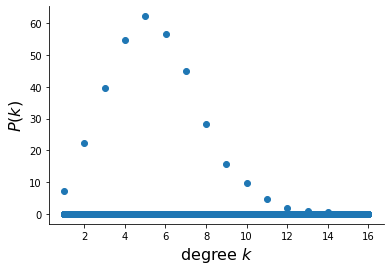

In [10]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# LogLog without log binning

In [11]:
bin_edges = np.linspace(kmin+1, kmax, num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

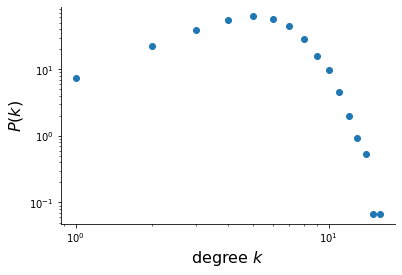

In [12]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# LogLog with log binning

In [13]:
bin_edges = np.logspace(np.log10(kmin+1), np.log10(kmax), num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

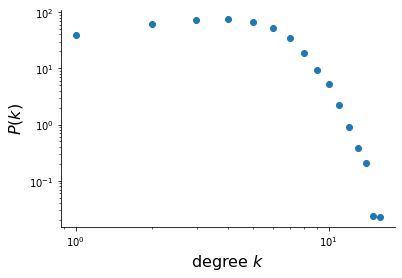

In [14]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# Cumulative edge distribution, logarithmic scale

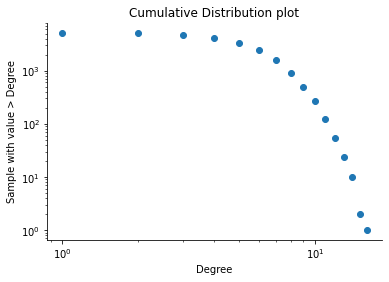

In [15]:
degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

# Zipf Distribution

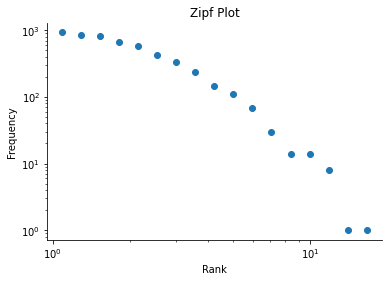

In [16]:

degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


bin_edges = np.logspace(np.log10(1), np.log10(len(deg)+1), num=len(deg)+1)
density, bins = np.histogram([i for i in range(len(cnt))], bins=bin_edges, density=True)
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x,sorted(cnt, reverse=True), marker='o', linestyle='none')
plt.title("Zipf Plot")
plt.ylabel("Frequency")
plt.xlabel("Rank")


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()
